<a href="https://colab.research.google.com/github/utkarshs75/Walmart-Sales-Prediction/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.

###Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.
1. Store: Store Number
2. Date: Week of Sales
3. Weekly_Sales: Sales for the given store in that week
4. Holiday_Flag: If it is a holiday week
5. Temperature: Temperature on the day of the sale
6. Fuel_Price: Cost of the fuel in the region
7. CPI: Consumer Price Index
8. Unemployment: Unemployment Rate

###Using the above data:
-> Come up with useful insights that can be used by each of
the stores to improve in various areas.

-> Forecast the sales for each store for the next 12 weeks.

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing datasets from drive and saving in variables.
data = pd.read_csv("/content/drive/MyDrive/IP_Capstone/Walmart.csv")

##Analysing Walmart Dataset

In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
651,5,12-08-2011,289886.16,0,90.16,3.638,216.167803,6.529
457,4,20-08-2010,1997181.09,0,78.83,2.671,126.076645,7.372
2900,21,12-11-2010,735796.38,0,60.95,2.728,211.660898,8.163
3634,26,25-03-2011,866566.54,0,22.99,3.624,133.958742,7.907
5346,38,25-02-2011,354232.34,0,48.45,3.530,128.130000,14.021


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
data.describe(include = ["O"]).T

,count,unique,top,freq
Date,6435,143,05-02-2010,45


In [10]:
data['Date'] = pd.to_datetime(data['Date']).dt.date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


##Preliminary EDA

In [11]:
data['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [12]:
data['Store'].nunique()

45

In [13]:
print('Last:', max(data['Date']), '\nFirst:', min(data['Date']))

Last: 2012-12-10 
First: 2010-01-10


In [14]:
data['Holiday_Flag'].unique()

array([0, 1])

### EDA Visualization

In [15]:
# Setting up parameters for plots

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 8
plt.rcParams['figure.figsize'] = (15, 10)
sns.set(font_scale = 2)
plt.rcParams['figure.facecolor'] = '80050001'

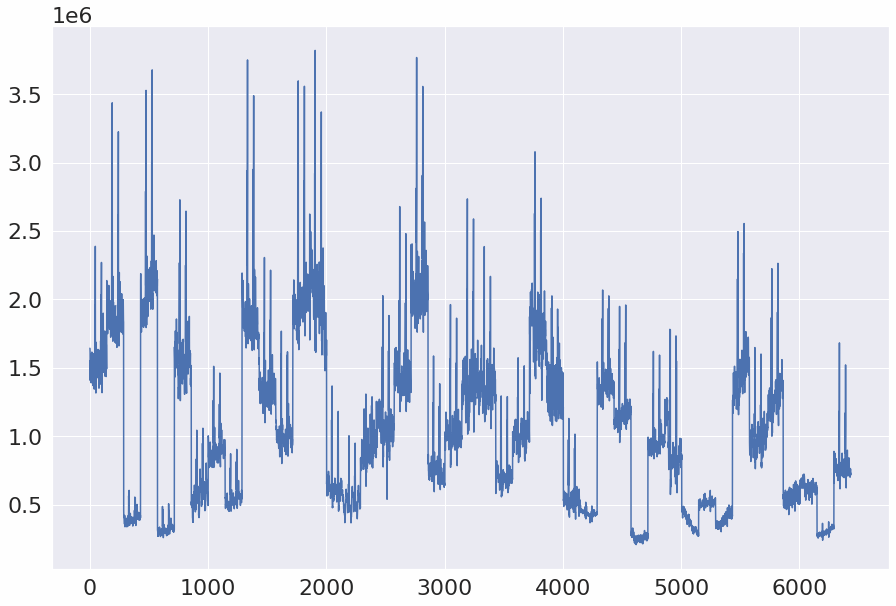

In [16]:
# Target variable is Weekly Sales So visualizing.

plt.plot(data['Weekly_Sales'])
plt.show()

In [17]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
